In [7]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score, accuracy_score, confusion_matrix, precision_score, f1_score
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
files = glob('differences/0.9/test/*.xlsx')
print(files)
dfs = []
for file in files:
    df = pd.read_excel(file, header=(0,1), index_col=0)
    dfs.append(df)

df = pd.concat(dfs)

['differences/0.9/test\\Speech_1_Obama_.xlsx', 'differences/0.9/test\\Speech_2_Maggie_Thatcher.xlsx', 'differences/0.9/test\\Speech_3_Testspeech.xlsx', 'differences/0.9/test\\Speech_4.xlsx']


In [9]:
def plot_cm(y_true, y_pred, title):
    ''''
    input y_true-Ground Truth Labels
          y_pred-Predicted Value of Model
          title-What Title to give to the confusion matrix
    
    Draws a Confusion Matrix for better understanding of how the model is working
    
    return None
    
    '''
    
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

C:\Users\felix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felix\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


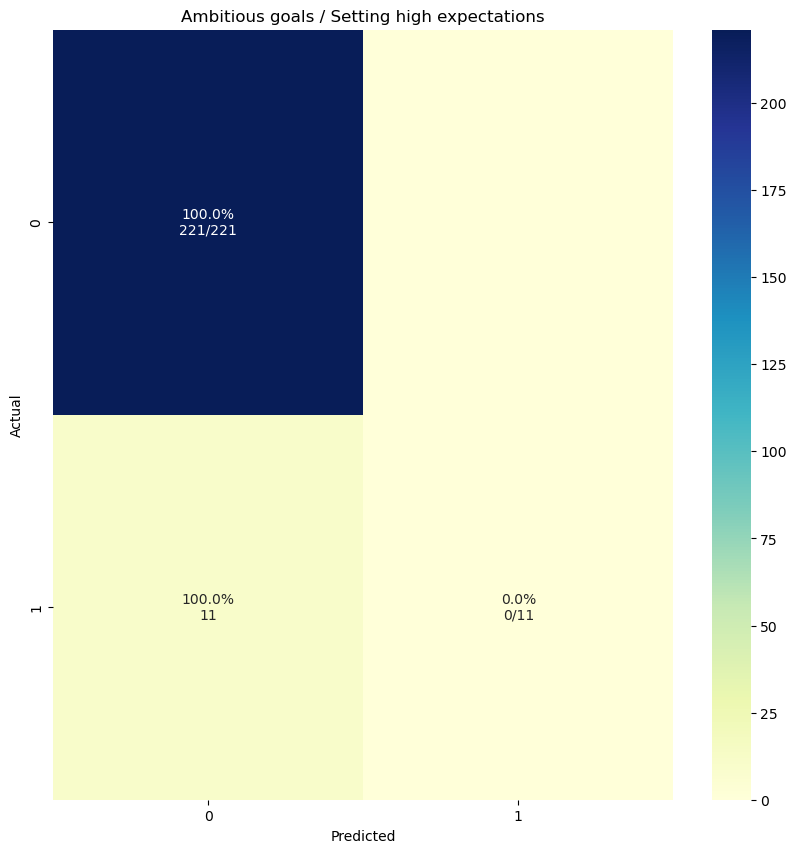

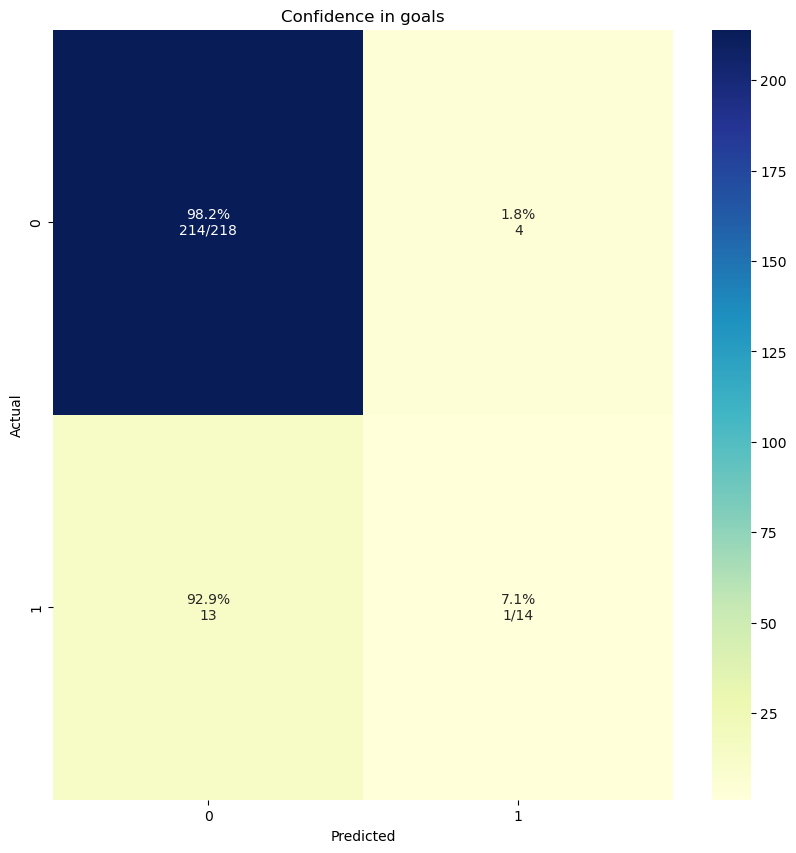

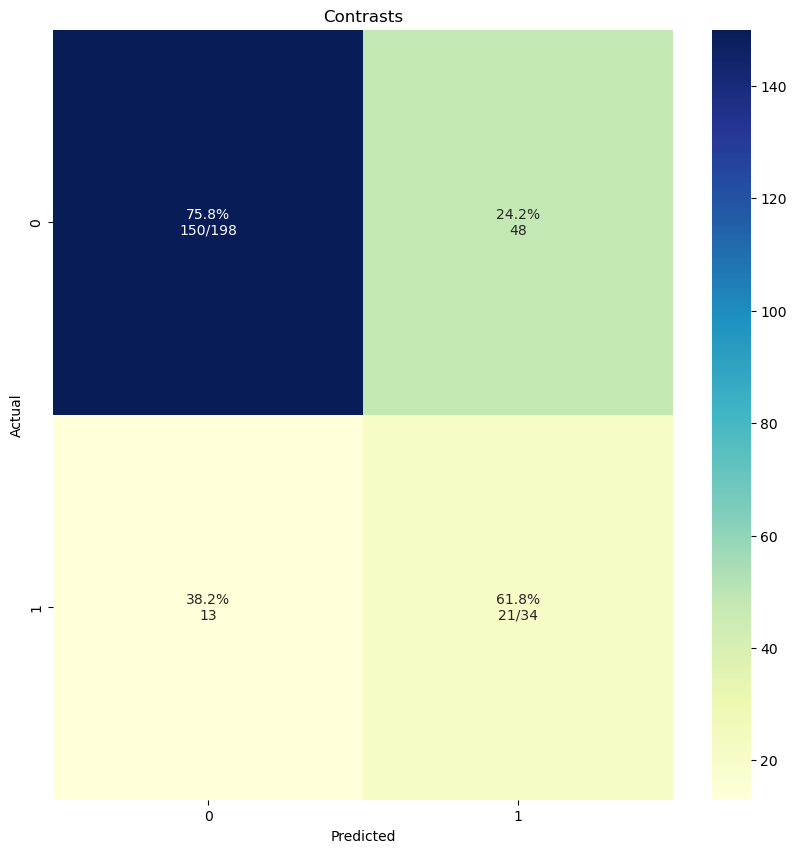

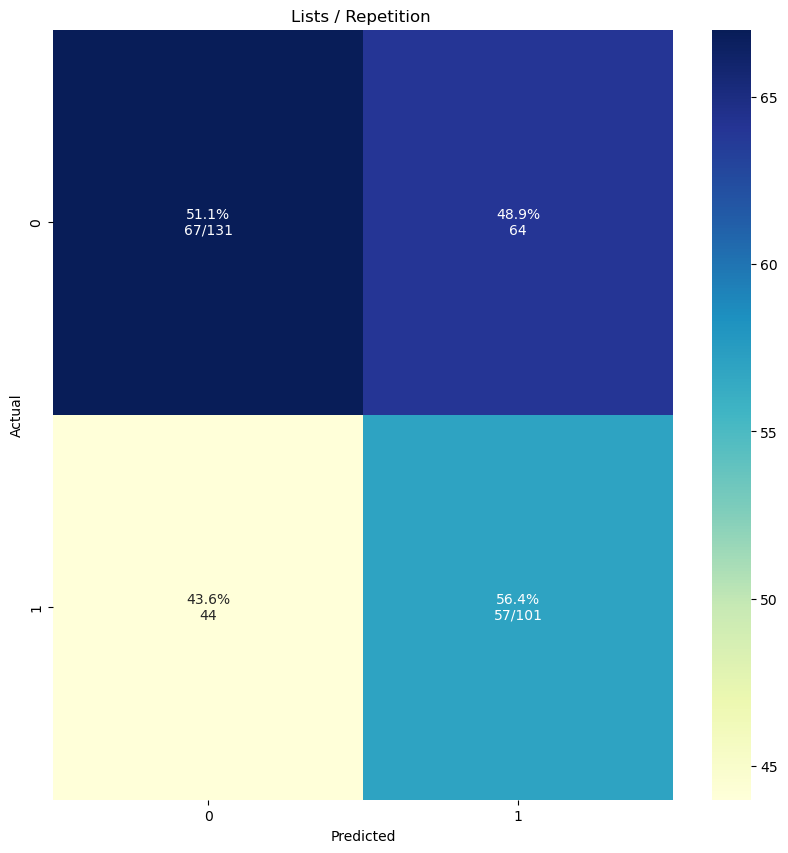

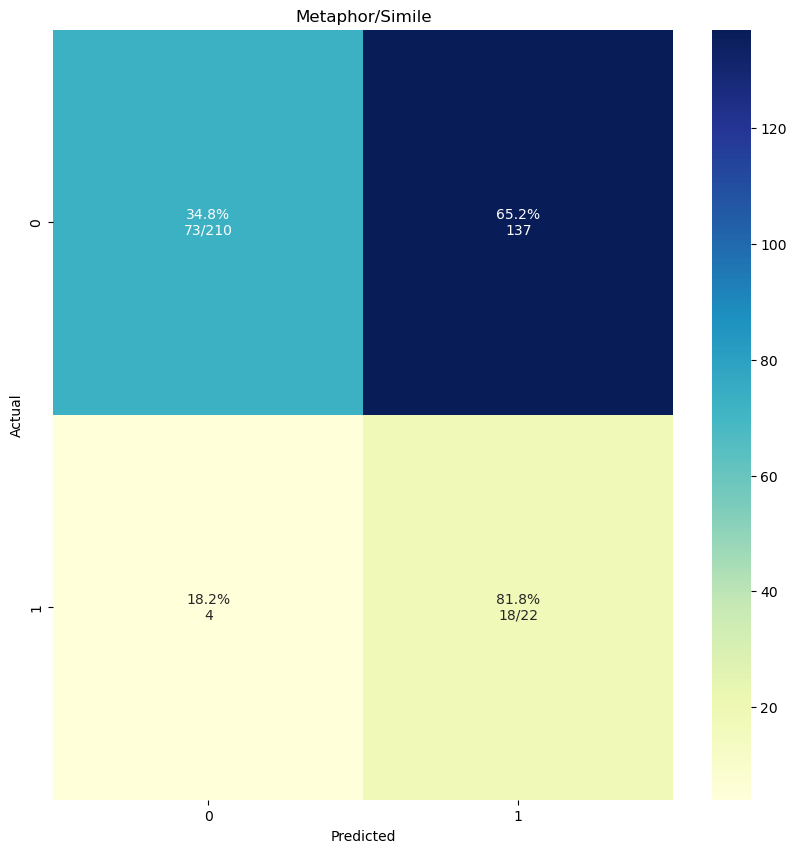

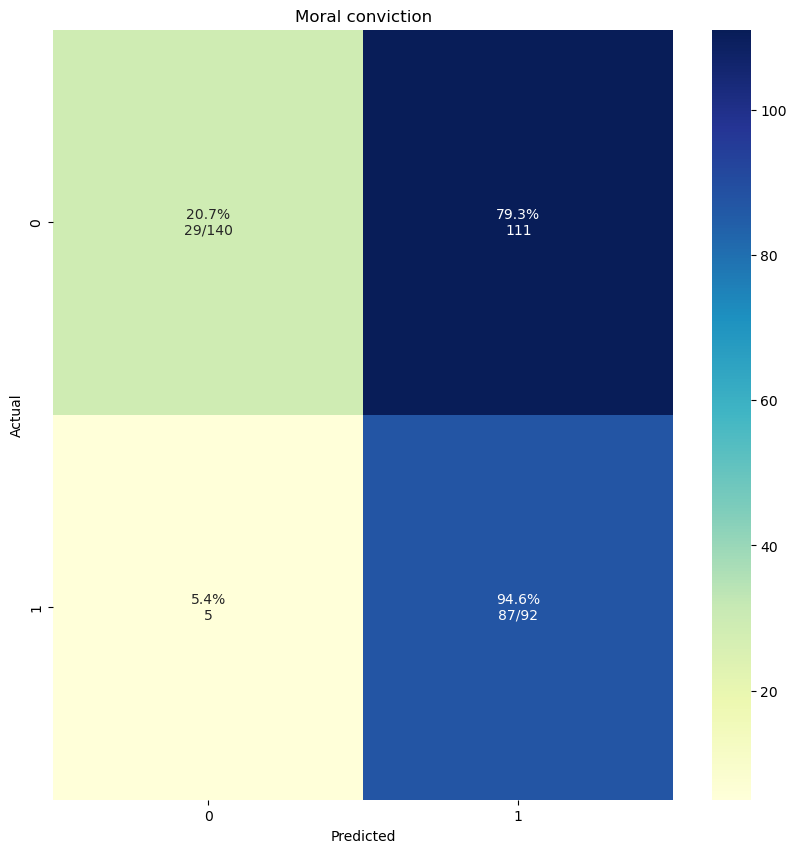

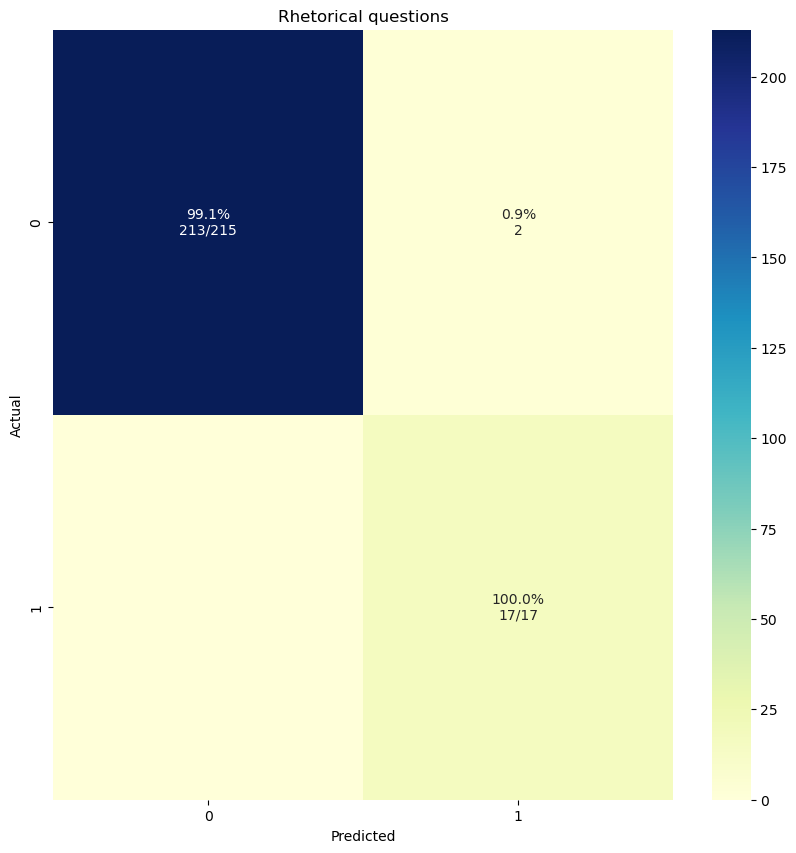

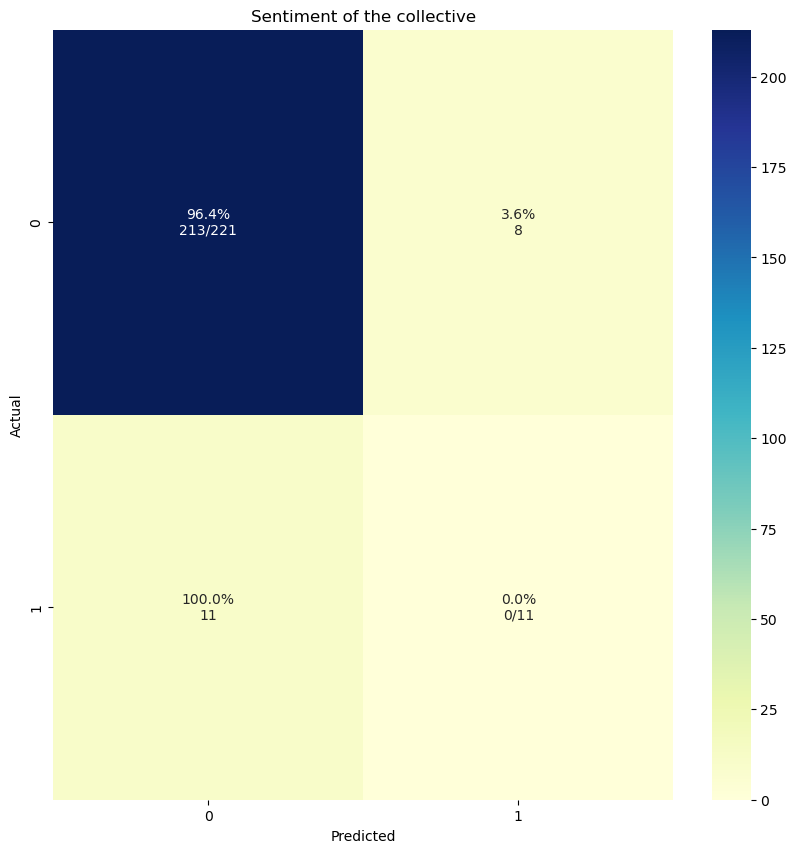

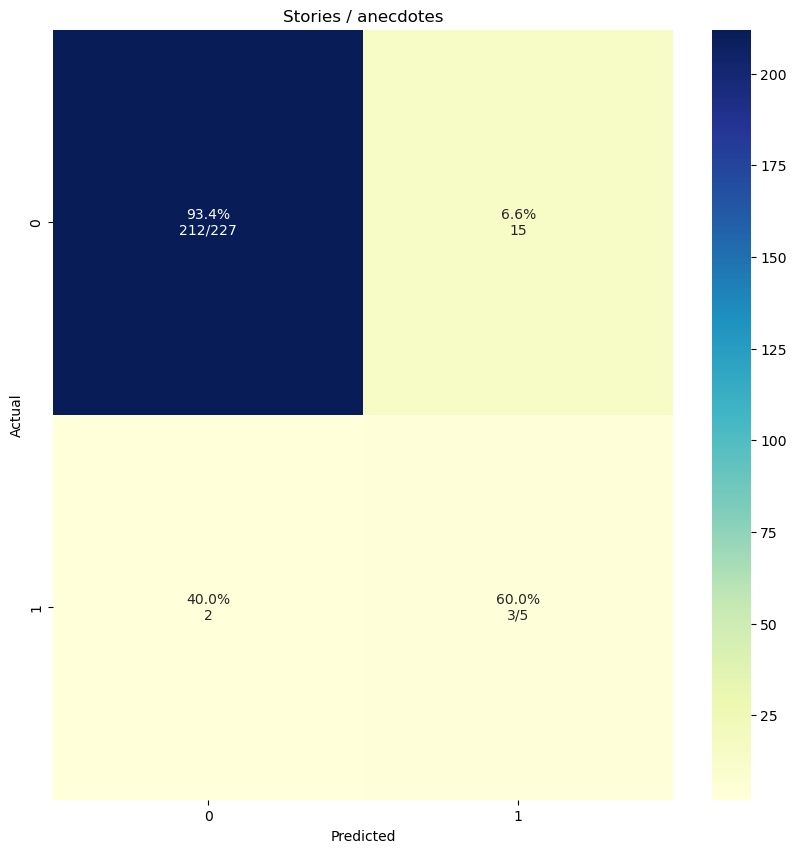

In [10]:
mccs = []
accs = []
bal_accs = []
precisions = []
f1s = []
results = pd.DataFrame(columns=['tactic','MCC', 'Accuracy', 'Precision'])
results['tactic']=df.columns.get_level_values(0).unique()[1:]
results.reindex=results.tactic
for tactic in df.columns.get_level_values(0).unique()[1:]:
    mcc = matthews_corrcoef(df[tactic]['Coding Human'],
                            df[tactic]['Coding AI'])
    mccs.append(mcc)
    acc = accuracy_score(df[tactic]['Coding Human'],
                            df[tactic]['Coding AI'])
    accs.append(acc)
    prec = precision_score(df[tactic]['Coding Human'],
                            df[tactic]['Coding AI'])
    precisions.append(prec)
    bal_acc = balanced_accuracy_score(df[tactic]['Coding AI'],
                            df[tactic]['Coding Human'])
    bal_accs.append(bal_acc)
    
    f1 = f1_score(df[tactic]['Coding AI'],
                            df[tactic]['Coding Human'])
    f1s.append(f1)

    
    plot_cm(df[tactic]['Coding Human'],
                            df[tactic]['Coding AI'], tactic)
    
results['MCC'] = mccs
results['Accuracy'] = accs
results['Balanced Accuracy'] = bal_accs
results['Precision'] = precisions
results['F1 Score'] = f1s

In [11]:
results

,tactic,MCC,Accuracy,Precision,Balanced Accuracy,F1 Score
0,Ambitious goals / Setting high expectations,0.000000,0.952586,0.000000,0.952586,0.000000
1,Confidence in goals,0.087041,0.926724,0.200000,0.571366,0.105263
2,Contrasts,0.290297,0.737069,0.304348,0.612297,0.407767
3,Lists / Repetition,0.075240,0.534483,0.471074,0.537339,0.513514
4,Metaphor/Simile,0.103156,0.392241,0.116129,0.532090,0.203390
5,Moral conviction,0.211347,0.500000,0.439394,0.646168,0.600000
6,Rhetorical questions,0.941495,0.991379,0.894737,0.947368,0.944444
7,Sentiment of the collective,-0.042162,0.918103,0.000000,0.475446,0.000000
8,Stories / anecdotes,0.289822,0.926724,0.166667,0.578660,0.260870
